# **CUSTOMER SEGMENT**

## Introduction
### Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
### Attributes

#### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
**Need to perform clustering to summarize customer segments.**

## **1.Import libary**

In [25]:
# data analysis libraries
import pandas as pd
import numpy as np
from datetime import datetime 

# data visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# remove warnings
import warnings
warnings.filterwarnings('ignore')



## **2.Reading Data**

In [26]:
#set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)

df_org = pd.read_csv("marketing_campaign.csv", sep="\t")
df_org.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [27]:
df_org.shape

(2240, 29)

In [28]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
# check missing values
df_org.isnull().sum()


ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
                  ..
AcceptedCmp2       0
Complain           0
Z_CostContact      0
Z_Revenue          0
Response           0
Length: 29, dtype: int64

In [30]:
# check duplicates
df_org.duplicated().sum()

0

**=>** The DataFrame needs cleaning before feature engineering:
- The “Income” column has 24 missing values.
- The “Dt_Customer” column is stored as an object in “dd-mm-yyyy” format instead of datetime64[ns].
- The “Education” and “Marital_Status” columns are categorical.

### **Cleanning Data**

In [31]:
# make a copy of original dataframe
df = df_org.copy()

In [32]:
# drop rows na values in Income column
df = df.dropna(subset=['Income'])
df.isnull().sum()

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
                 ..
AcceptedCmp2      0
Complain          0
Z_CostContact     0
Z_Revenue         0
Response          0
Length: 29, dtype: int64

In [33]:
#checking for categorial columns
cat_cols = df.select_dtypes(include=['object']).columns
for cat in cat_cols:
    print(f"\n Values count for {cat}: {df[cat].value_counts()}")
    print("-"*25)


 Values count for Education: Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
-------------------------

 Values count for Marital_Status: Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
-------------------------

 Values count for Dt_Customer: Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: count, Length: 662, dtype: int64
-------------------------


In [34]:
# convert the Dt_Customer column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Year'] = df['Dt_Customer'].dt.year


In [35]:
print ('Max date in dataset:', df['Dt_Customer'].max())
print ('Min date in dataset:', df['Dt_Customer'].min())

Max date in dataset: 2014-06-29 00:00:00
Min date in dataset: 2012-07-30 00:00:00


## **3. Feature engineering**

In [36]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year'],
      dtype='object')

**=> I will create new features based on existing columns:**
- Tenure → how long the customer has been with the company (since joining date).
- Recency → how long it has been since the last purchase until the current date.
- Total_Spent = Sum of ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
- Total_Purchases = Sum of['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumDealsPurchases']
- Living_Situation = alone / not_alone
- Education_Level = undergraduate / graduate / postgraduate
- Total_Children = Sum of ['Kidhome', 'Teenhome']
- Is_Parent = IF Total_Children > 0, Yes (1) ELSE No (0)
- Age = 2025 - Year_Birth
- Web_Ratio = ['NumWebPurchases'] / ['Total_Purchases']
- Store_Ratio = ['NumStorePurchases'] /['Total_Purchases']
- Deal_Ratio' = ['NumDealsPurchases'] / ['Total_Purchases']

In [37]:
# Calculate customer tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
latest_date = df['Dt_Customer'].max()
df['Tenure'] = (latest_date - df['Dt_Customer']).dt.days

In [38]:
## Declare today's date
today_date_str = '2025-08-05'
today_date = pd.to_datetime(today_date_str, format= '%Y-%m-%d')

## Calculate 'Customer_Active_Days' 
df['Customer_Active_Days'] = (today_date - df['Dt_Customer']).dt.days

In [39]:
# Create new features
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 
                                             'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [40]:
# Calculate channel preferences
df['Web_Ratio'] = df['NumWebPurchases'] / df['Total_Purchases'].replace(0, np.nan)
df['Store_Ratio'] = df['NumStorePurchases'] / df['Total_Purchases'].replace(0, np.nan)
df['Deal_Ratio'] = df['NumDealsPurchases'] / df['Total_Purchases'].replace(0, np.nan)

In [41]:
# Living_Situation
df.loc[df['Marital_Status'].isin(['Together','Married']),'Living_Situation'] = 'not_alone'
df.loc[df['Marital_Status'].isin(['Single','Divorced','Widow','Alone','Absurd','YOLO']),'Living_Situation'] = 'alone'

#  Education_Level
df.loc[df['Education'].isin(['Graduation']),'Education_Level'] = 'graduate'
df.loc[df['Education'].isin(['Basic','2n Cycle']),'Education_Level'] = 'undergraduate'
df.loc[df['Education'].isin(['PhD','Master']),'Education_Level'] = 'postgraduate'

In [42]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Living_Situation,Education_Level
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,663,4718,1617,25,0.320000,0.160000,0.120000,alone,graduate
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,113,4168,27,6,0.166667,0.333333,0.333333,alone,graduate
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,312,4367,776,21,0.380952,0.476190,0.047619,not_alone,graduate
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,139,4194,53,8,0.250000,0.500000,0.250000,not_alone,graduate
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,161,4216,422,19,0.263158,0.315789,0.263158,not_alone,postgraduate


In [43]:
# Total_Children = Sum of ['Kidhome', 'Teenhome']
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Is_Parent = IF Total_Children > 0, Yes (1) ELSE No (0)
df['Is_Parent'] = np.where(df['Total_Children'] > 0, 1, 0)

# Age = 2025 - Year_Birth
df['Age'] = 2025 - df['Year_Birth']

In [44]:
plt.style.use('ggplot')


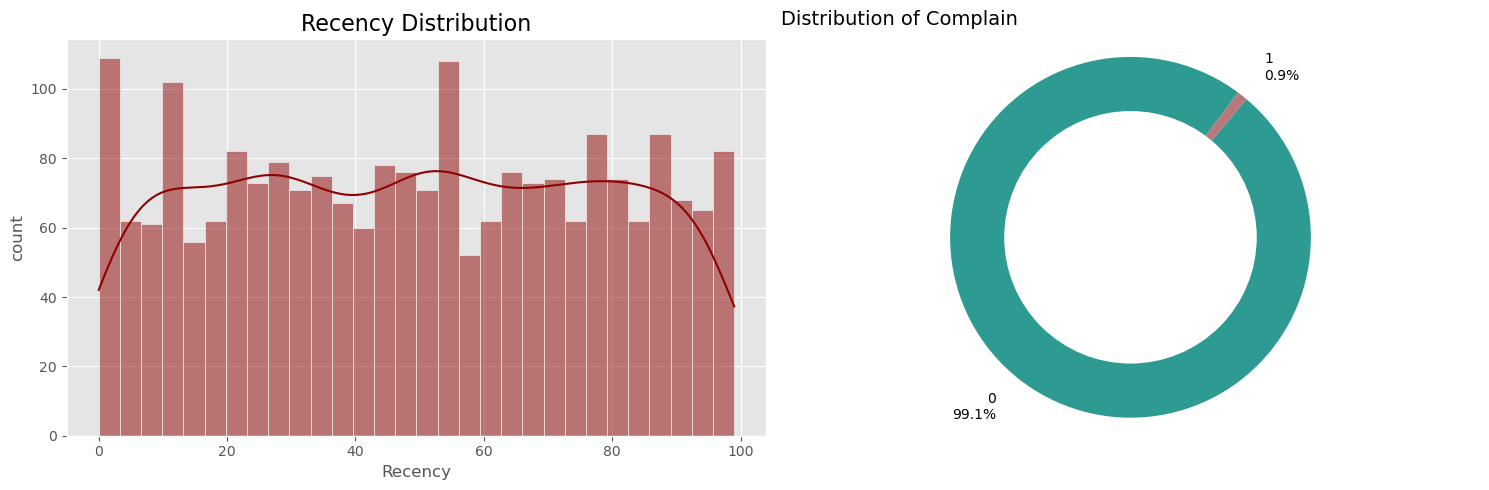

In [45]:
# Recency distribution
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
# Recency distribution (draw on the first axis)
sns.histplot(data=df, x='Recency', bins=30, kde=True, ax=axes[0], color='#8e0201')
axes[0].set_title('Recency Distribution', fontsize=16)
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('count')

# Complain distribution (pie) on the second axis
counts = df['Complain'].value_counts().sort_index()
labels = [f"{int(idx)}\n{count / len(df) * 100:.1f}%" for idx, count in counts.items()]
colors = ["#2e9b92", "#b67878"]

axes[1].pie(counts, labels=labels, startangle=50, counterclock=False,
            pctdistance=0.8, labeldistance=1.2, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title('Distribution of Complain', fontsize=14, loc='left', pad=10)
axes[1].axis('equal')

plt.tight_layout()
plt.show()



- A vast majority of the customers did not complain in the last two years.

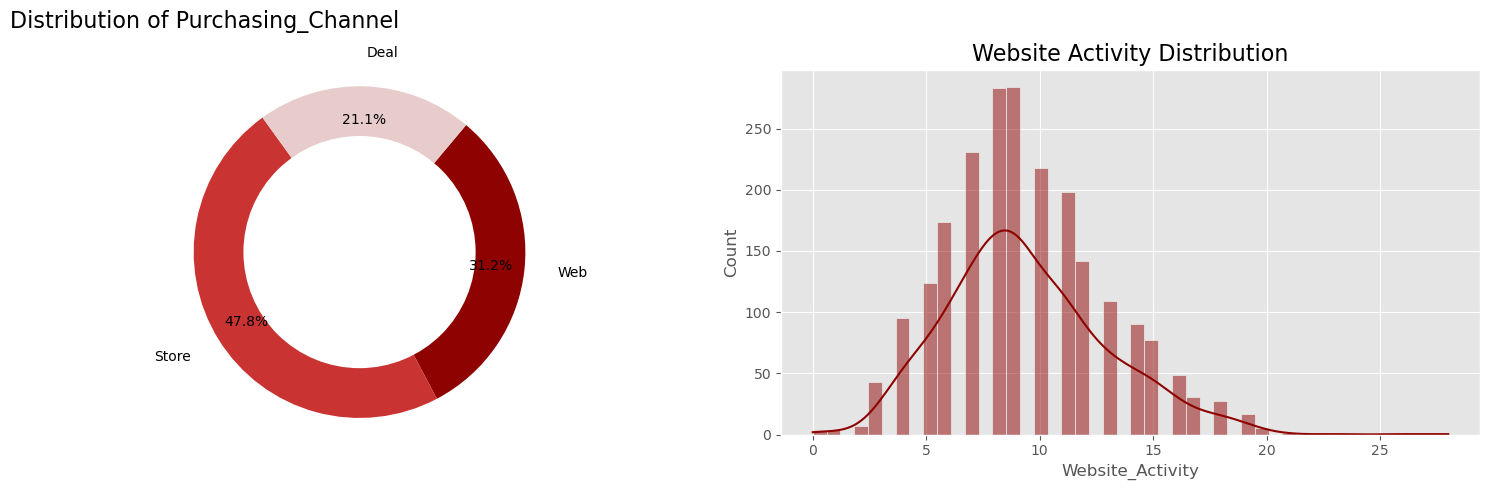

In [46]:
# Calculate total counts for each channel
channel_counts = {
    'Web': df['Web_Ratio'].sum(),
    'Store': df['Store_Ratio'].sum(),
    'Deal': df['Deal_Ratio'].sum()
}

labels = list(channel_counts.keys())
sizes = list(channel_counts.values())
colors = ['#8e0201', '#c93432', '#e8cccc']

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

#  Donut Chart for Purchasing_Channel
axes[0].pie(sizes, labels=labels, startangle=50, counterclock=False,
            pctdistance=0.8, labeldistance=1.2, colors=colors, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0].add_artist(centre_circle)
axes[0].set_title('Distribution of Purchasing_Channel', fontsize=16, loc='left', pad=30)
axes[0].axis('equal')

# Distribution Chart for Website_Activity
# website activity
website_cols = ['NumWebPurchases', 'NumWebVisitsMonth']
df['Website_Activity'] = df[website_cols].sum(axis=1)
sns.histplot(df['Website_Activity'], kde=True, color='#8e0201', ax=axes[1])
axes[1].set_title('Website Activity Distribution', fontsize=16)

plt.tight_layout()
plt.show()



- Majority of the customers made purchases via the Store.
- The Website Activity distribution is positively skewed



In [47]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Tenure', 'Customer_Active_Days', 'Total_Spent',
       'Total_Purchases', 'Web_Ratio', 'Store_Ratio', 'Deal_Ratio',
       'Living_Situation', 'Education_Level', 'Total_Children', 'Is_Parent',
       'Age', 'Website_Activity'],
      dtype='object')

In [48]:
drop_cols = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'NumDealsPurchases',
    'NumWebPurchases', 'NumStorePurchases']
df2 = df.copy()
df2.drop(drop_cols, axis = 1, inplace=True)

In [49]:
# Select features for clustering
# Define the desired feature list 
df_features = [
    'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'Web_Ratio', 'Store_Ratio', 'Deal_Ratio', 
    'NumCatalogPurchases', 'NumWebVisitsMonth','AcceptedCmp1', 'AcceptedCmp2', 
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Response', 
    'Customer_Active_Days','Total_Spent', 'Living_Situation', 'Education_Level', 
    'Total_Children', 'Is_Parent', 'Age', 'Total_Purchases'
]

# Keep only the features that actually exist in df2 to avoid length mismatch
features = [f for f in df_features if f in df2.columns]

# Inform if anything expected is missing
missing = [f for f in df_features if f not in features]
if missing:
    print(f"Warning: the following expected features are not present in df2 and will be skipped: {missing}")



In [50]:
df2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Total_Children,Is_Parent,Age,Website_Activity
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2212.000000,2212.000000,2212.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.671029,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,2013.028430,353.521209,4408.521209,607.075361,14.880866,0.267265,0.409738,0.180577,0.947202,0.714350,56.179603,9.404332
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,2.926734,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,0.685618,202.434667,202.434667,602.900476,7.670957,0.098456,0.118842,0.111044,0.749062,0.451825,11.985554,3.565683
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,4055.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,180.000000,4235.000000,69.000000,8.000000,0.200000,0.333333,0.076923,0.000000,0.000000,48.000000,7.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,355.500000,4410.500000,396.500000,15.000000,0.260870,0.411765,0.166667,1.000000,1.000000,55.000000,9.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,529.000000,4584.000000,1048.000000,21.000000,0.333333,0.500000,0.250000,1.000000,1.000000,66.000000,11.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,28.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,699.000000,4754.000000,2525.000000,44.000000,1.000000,1.000000,1.000000,3.000000,1.000000,132.000000,28.000000


### **Plotting some infomation**

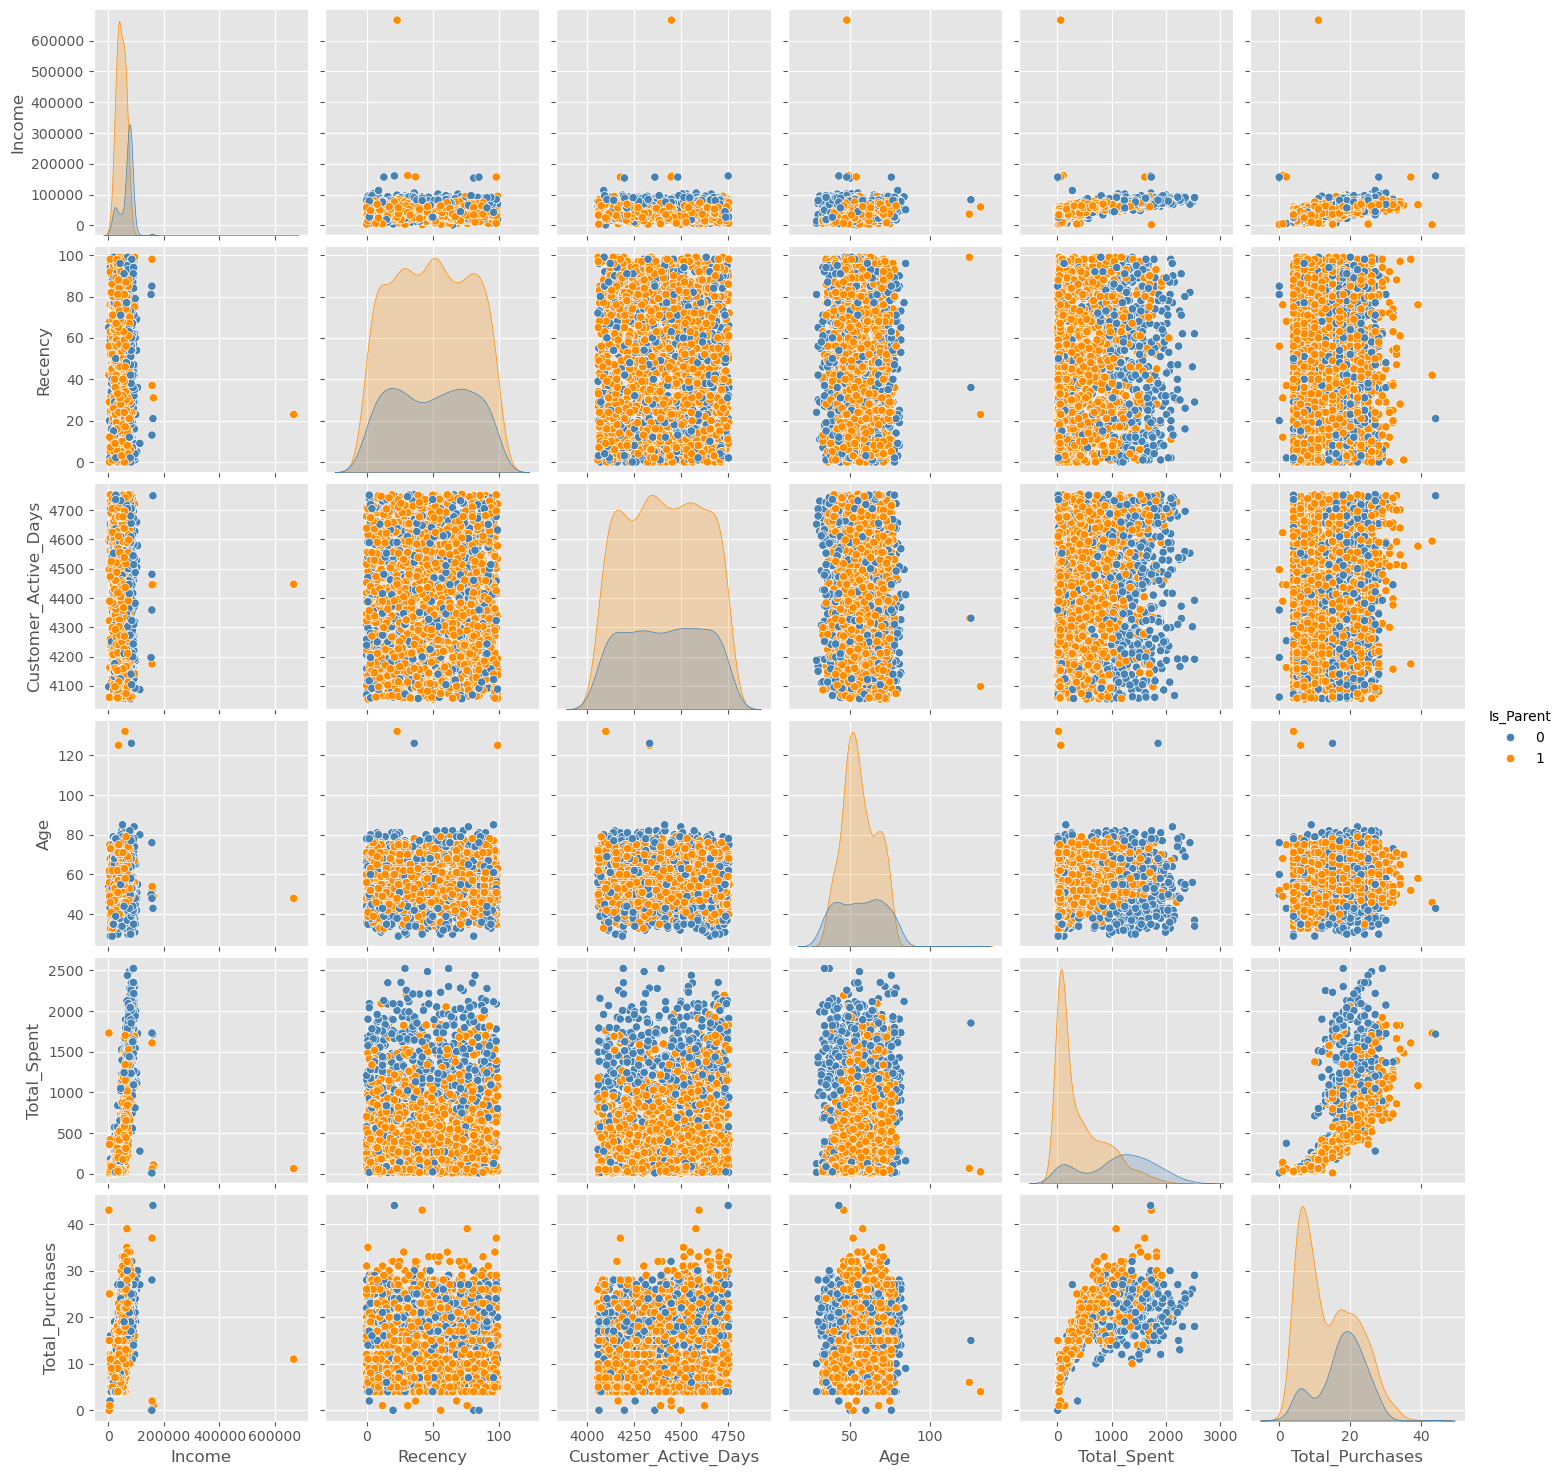

In [51]:
plotting_cols = ["Income", "Recency", "Customer_Active_Days", "Age", "Total_Spent", "Total_Purchases", "Is_Parent"]

sns.pairplot(data = df2[plotting_cols],
             hue = 'Is_Parent',
             palette= (['steelblue','darkorange'])
)
plt.show()

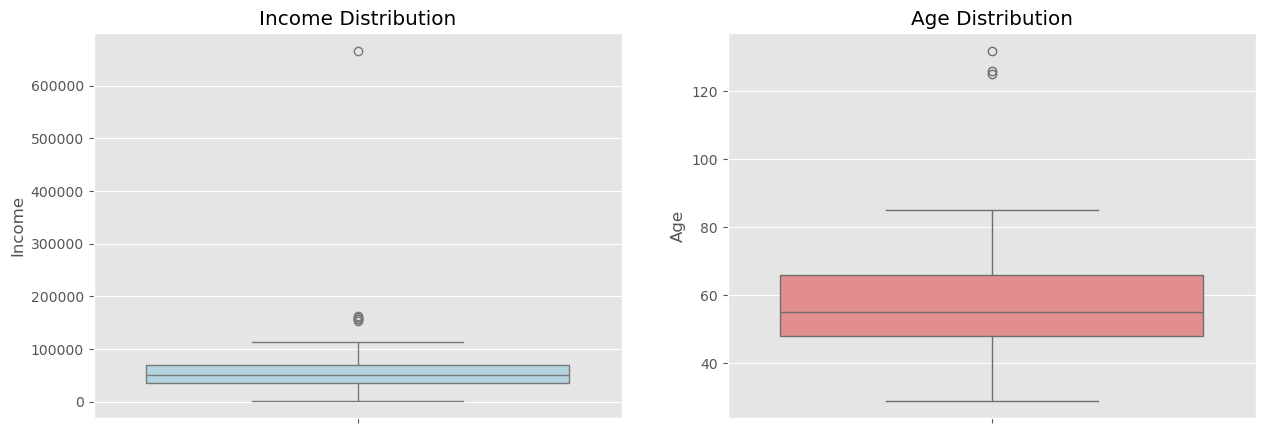

In [52]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
# boxplot for Income
sns.boxplot(y=df['Income'], ax=axes[0], color='lightblue')
axes[0].set_title('Income Distribution')

# boxplot for Age
sns.boxplot(y=df['Age'], ax=axes[1], color='lightcoral')
axes[1].set_title('Age Distribution')

plt.show()

**Clearly, there are a few outliers in the Income and Age features. I will remove the outlier in the data using IQR rule .**

In [53]:
# Calculate upper and lower bounds for Income
q1_income = np.percentile(df2['Income'], 25)
q2_income = np.percentile(df2['Income'], 50)
q3_income = np.percentile(df2['Income'], 75)
iqr_income = q3_income - q1_income
lower_bound_income = q1_income - 1.5 * iqr_income
upper_bound_income = q3_income + 1.5 * iqr_income


# Calculate upper and lower bounds for Age
q1_age = np.percentile(df2['Age'], 25)
q2_age = np.percentile(df2['Age'], 50)
q3_age = np.percentile(df2['Age'], 75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age

print ('Bound for Income:', lower_bound_income, 'to', upper_bound_income)
print ('Bound for Age:', lower_bound_age, 'to', upper_bound_age)

Bound for Income: -14525.5 to 118350.5
Bound for Age: 21.0 to 93.0


In [54]:
#remove outliers
df2 = df2[(df2['Income'] >= lower_bound_income) & (df2['Income'] <= upper_bound_income)]
df2 = df2[(df2['Age'] >= lower_bound_age) & (df2['Age'] <= upper_bound_age)]


Next, look at the correlation amongst the features. (Excluding the categorical attributes at this point)

Text(0.5, 1.0, 'Correlation Matrix')

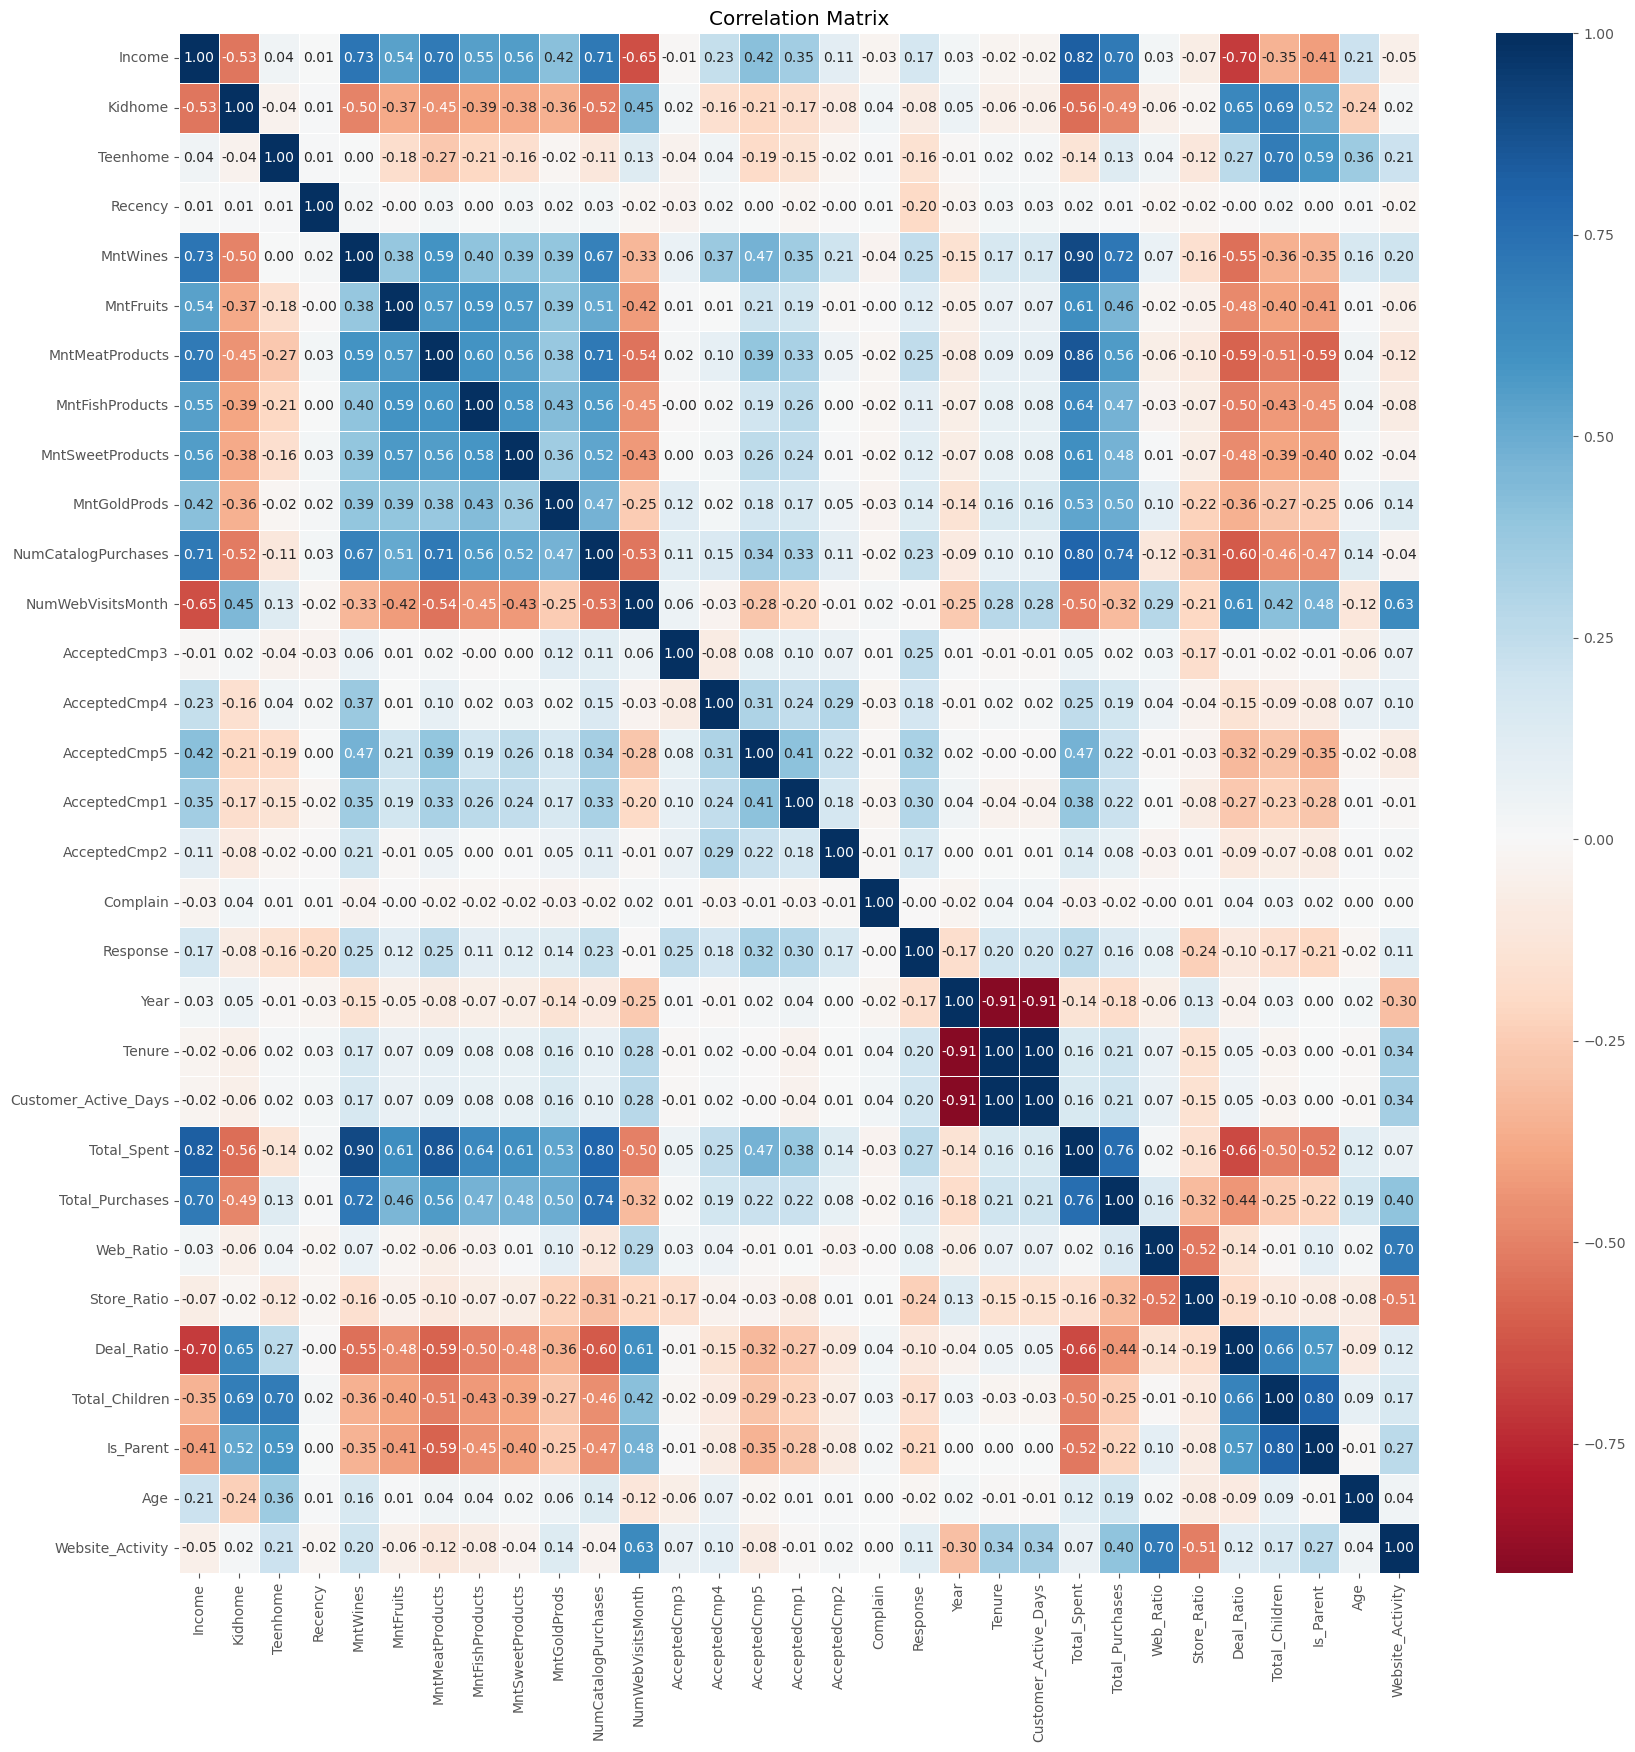

In [55]:
# correlation matrix (use only numeric columns to avoid conversion errors)
corr_matrix = df2.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdBu',
            center=0,
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Matrix')

The data is quite clean and the new features have been included. 

## 4.PreProcessing Data

In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [56]:
# get list of catagorical columns
obj = (df2.dtypes == 'object')
obj_cols = list(obj[obj].index)
print ('Categorical collumn are:', obj_cols)

Categorical collumn are: ['Education', 'Living_Situation', 'Education_Level']


In [57]:
LE = LabelEncoder()
for col in obj_cols:
    df2[col] = df2[[col]].apply(LE.fit_transform)

print ('Label Encoding categorical columns completed.')
print ('Sample after LabelEncoding:')
print (df2[obj_cols].head())


Label Encoding categorical columns completed.
Sample after LabelEncoding:
   Education  Living_Situation  Education_Level
0          2                 0                0
1          2                 0                0
2          2                 1                0
3          2                 1                0
4          4                 1                1


In [58]:
# creating a new df , renainning only the features needed for clustering
drop_col = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

input_df = df2.copy()
input_df.drop(drop_col, axis=1, inplace=True)
input_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumWebVisitsMonth,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Living_Situation,Education_Level,Total_Children,Is_Parent,Age,Website_Activity
0,2,58138.0,0,0,58,635,88,546,172,88,88,10,7,2012,663,4718,1617,25,0.320000,0.160000,0.120000,0,0,0,0,68,15
1,2,46344.0,1,1,38,11,1,6,2,1,6,1,5,2014,113,4168,27,6,0.166667,0.333333,0.333333,0,0,2,1,71,6
2,2,71613.0,0,0,26,426,49,127,111,21,42,2,4,2013,312,4367,776,21,0.380952,0.476190,0.047619,1,0,0,0,60,12
3,2,26646.0,1,0,26,11,4,20,10,3,5,0,6,2014,139,4194,53,8,0.250000,0.500000,0.250000,1,0,1,1,41,8
4,4,58293.0,1,0,94,173,43,118,46,27,15,3,5,2014,161,4216,422,19,0.263158,0.315789,0.263158,1,1,1,1,44,10


In [59]:
scaler = StandardScaler()
scaler.fit(input_df)
scaled_df = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)
print ('Scaling completed. Sample of scaled data:')
scaled_df.head()

Scaling completed. Sample of scaled data:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumWebVisitsMonth,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Living_Situation,Education_Level,Total_Children,Is_Parent,Age,Website_Activity
0,-0.350162,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,2.628526,0.689203,-1.498307,1.527183,1.527183,1.679323,1.328161,0.535375,-2.131431,-0.546937,-1.347625,-0.892338,-1.266589,-1.58466,1.017189,1.573210
1,-0.350162,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.588043,-0.139645,1.417639,-1.188629,-1.188629,-0.963897,-1.167390,-1.031849,-0.654214,1.378731,-1.347625,-0.892338,1.403420,0.63105,1.273530,-0.972274
2,-0.350162,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.230646,-0.554069,-0.040334,-0.205999,-0.205999,0.281242,0.802782,1.158370,0.563272,-1.200289,0.742046,-0.892338,-1.266589,-1.58466,0.333612,0.724716
3,-0.350162,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.945440,0.274779,1.417639,-1.060245,-1.060245,-0.920675,-0.904700,-0.180097,0.766187,0.626517,0.742046,-0.892338,0.068415,0.63105,-1.289883,-0.406610
4,1.432997,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,0.126750,-0.139645,1.417639,-0.951612,-0.951612,-0.307248,0.540092,-0.045610,-0.803730,0.745287,0.742046,0.571654,0.068415,0.63105,-1.033542,0.159053


In [60]:
scaled_df.shape

(2205, 27)

## 5.Customer Segment and Dimension Reduction using KMean 

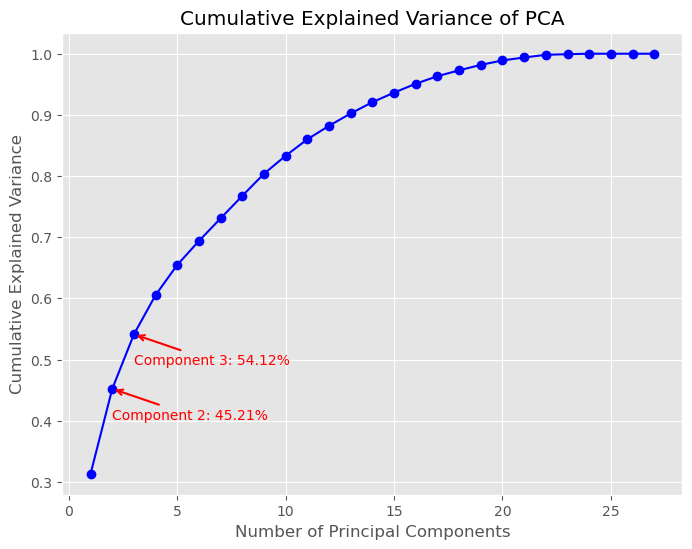

In [61]:
plt.style.use('ggplot')

# PCA requires no NaNs — reuse an existing imputer if available, otherwise create one
X_input = np.asarray(scaled_df)

try:
    # if 'imputer' exists and is fitted use it
    X_clean = imputer.transform(X_input)
except NameError:
    # create and fit a SimpleImputer (median) if no imputer exists yet
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X_clean = imputer.fit_transform(X_input)

# apply PCA on the imputed data
pca = PCA()
X_pca = pca.fit_transform(X_clean)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance,
         marker='o',
         linestyle='-',
         color='b')
plt.title('Cumulative Explained Variance of PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Annotate only if those components exist
if len(cumulative_explained_variance) >= 2:
    plt.annotate(f'Component 2: {cumulative_explained_variance[1]*100:.2f}%',
                 xy=(2, cumulative_explained_variance[1]),
                 xytext=(2, cumulative_explained_variance[1] - 0.05),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5, color='red'),
                 color='red'
                 )

if len(cumulative_explained_variance) >= 3:
    plt.annotate(f'Component 3: {cumulative_explained_variance[2]*100:.2f}%',
                 xy=(3, cumulative_explained_variance[2]),
                 xytext=(3, cumulative_explained_variance[2] - 0.05),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5, color='red'),
                 color='red'
                 )

plt.show()

Clearly, the less Principal Components (Dimensions) the less explained proportion they can "explained"
- Case 1: 2 Components (45.21%)
- Case 2: 3 Components (54.12%)
But for this project, I want to use case 2: components 3 with the best visualization .(54.12%)

#### Dimensional Reduction

In [62]:
# Reduce dimensions
# Ensure there are no NaNs before applying PCA (PCA does not accept NaN)
X_input = np.asarray(scaled_df)

try:
	# reuse an existing imputer if available
	X_clean = imputer.fit_transform(X_input)
except NameError:
	from sklearn.impute import SimpleImputer
	imputer = SimpleImputer(strategy='median')
	X_clean = imputer.fit_transform(X_input)

pca_3dim = PCA(n_components=3)
X_pca_3dim = pca_3dim.fit_transform(X_clean)
X_pca_3dim

array([[ 5.20965037,  3.39299828, -0.97683904],
       [-3.04231443, -1.86312301,  1.75398025],
       [ 2.32641915, -0.39151733, -0.32293188],
       ...,
       [ 2.03524867, -2.80896348, -0.84665886],
       [ 1.63440012, -1.26342012,  2.50870156],
       [-2.31499567,  2.34052802,  0.09659195]])

In [63]:
PCA_df_dim = pd.DataFrame(data=X_pca_3dim, columns=['PC1', 'PC2', 'PC3'])
PCA_df_dim.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2205.0,9.667248e-17,2.908869,-6.502737,-2.660524,-0.788212,2.381737,7.639815
PC2,2205.0,8.378282e-17,1.936700,-5.346006,-1.458488,-0.093618,1.386512,5.081435
PC3,2205.0,2.255691e-17,1.551262,-5.281292,-1.064296,0.067824,1.093555,5.281824


Note: you may need to restart the kernel to use updated packages.


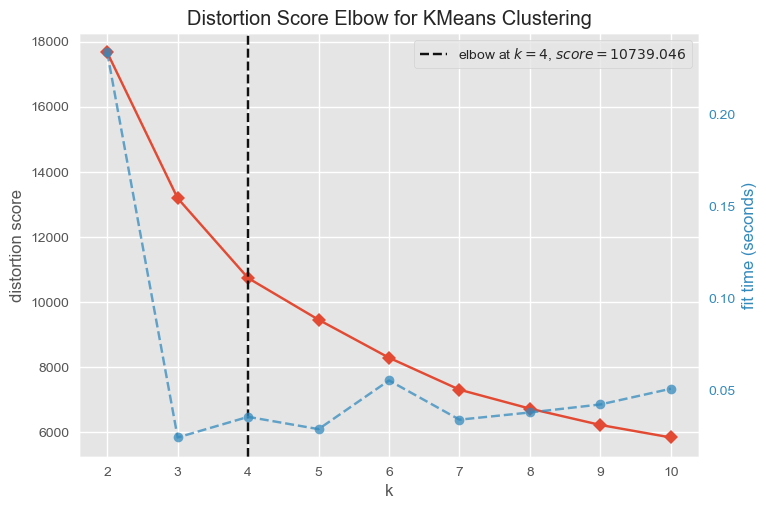

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:

%pip install -q yellowbrick

# import the elbow visualizer
from yellowbrick.cluster import KElbowVisualizer

plt.style.use('ggplot')

elbow = KElbowVisualizer(KMeans(n_init=10, random_state=42), k=10)
elbow.fit(PCA_df_dim)
elbow.show()

In [65]:
# apply KMeans with the optimal number of clusters (k=4 from elbow method)
kmeans_dim = KMeans(n_clusters=4, n_init=10, random_state=42)
cluster_dim = kmeans_dim.fit_predict(X_pca_3dim)


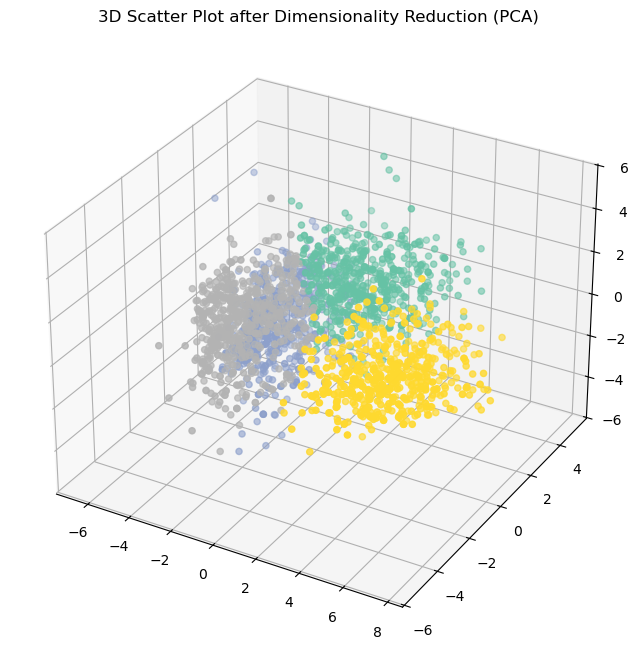

In [66]:
plt.style.use('default')

x = PCA_df_dim['PC1']
y = PCA_df_dim['PC2']
z = PCA_df_dim['PC3']

#Plotting 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c= cluster_dim, cmap = 'Set2_r', marker='o')
ax.set_title('3D Scatter Plot after Dimensionality Reduction (PCA)')
plt.show()

In [67]:
df2['Cluster'] = kmeans_dim.labels_

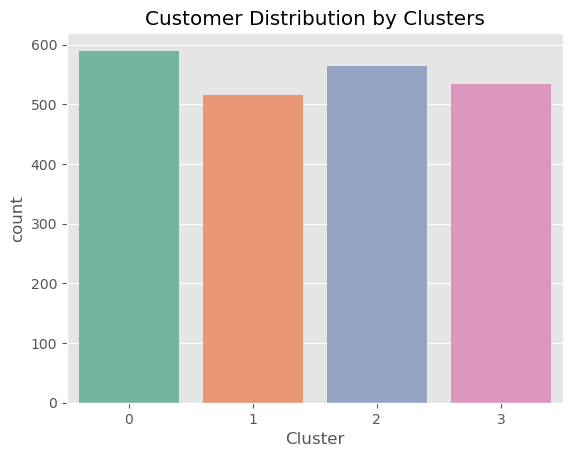

In [68]:
df_cluster_count = df2.groupby(by = 'Cluster',as_index = False).agg(count = ('Cluster','count')).sort_values(by = 'Cluster',ascending=True)

plt.style.use('ggplot')

sns.barplot(data = df_cluster_count
            ,x = 'Cluster'
            ,y = 'count'
            ,palette='Set2')

plt.title('Customer Distribution by Clusters')
plt.show()

**Insight:** No of Customers between Clusters are fairly equal

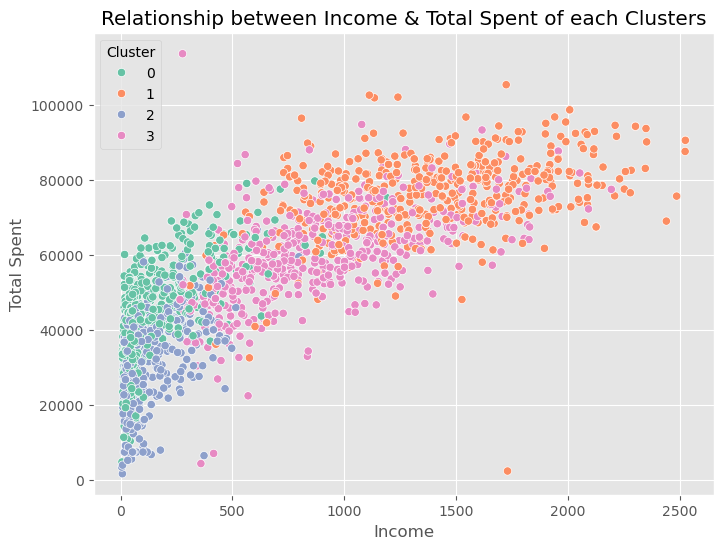

In [69]:
plt.figure(figsize = (8,6))

sns.scatterplot(data = df2
                , y = 'Income'
                , x = 'Total_Spent'
                , hue = 'Cluster'
                , palette= 'Set2')

plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Relationship between Income & Total Spent of each Clusters')

plt.show()

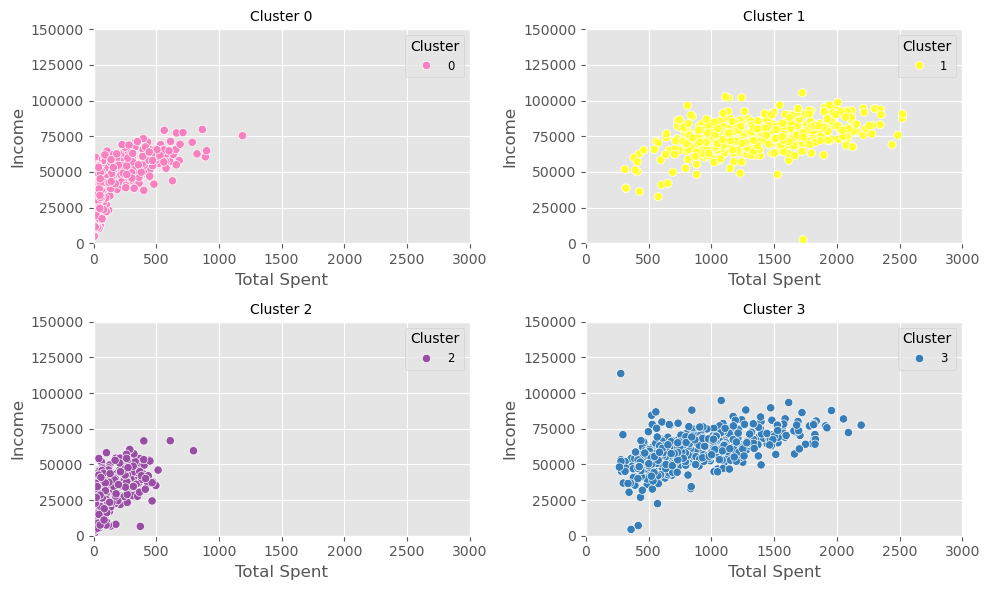

In [70]:
custom_palette = sns.color_palette("Set1_r", n_colors=len(df2['Cluster'].unique()))

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    row, col = divmod(i, 2)
    sns.scatterplot(data=df2[df2['Cluster'] == cluster], y='Income', x='Total_Spent', hue='Cluster', palette=[custom_palette[cluster]], ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}',size = 10)
    axes[row, col].set_ylabel('Income',size = 12 )
    axes[row, col].set_xlabel('Total Spent', size = 12)
    axes[row, col].legend(title='Cluster', fontsize='small', title_fontsize='medium')
    axes[row, col].set_ylim(0, 150000)
    axes[row, col].set_xlim(0, 3000)

plt.tight_layout()
plt.show()

**Insights**
- **Cluster 0** : Low Spent, Low Income
- **Cluster 1** : High Spent, High Income -> **The best targeted customers** 
- **Cluster 2** : Low Spent, Average Income
- **Cluster 3** : High Spent, Average Income -> **Potential targeted customers** 


In [71]:
df2['Total_PromoAccepted'] = df2["AcceptedCmp1"]+ df2["AcceptedCmp2"]+ df2["AcceptedCmp3"]+ df2["AcceptedCmp4"]+ df2["AcceptedCmp5"]

print('Range of Total_PromoAccepted: ', df2['Total_PromoAccepted'].unique())

Range of Total_PromoAccepted:  [0 1 2 3 4]


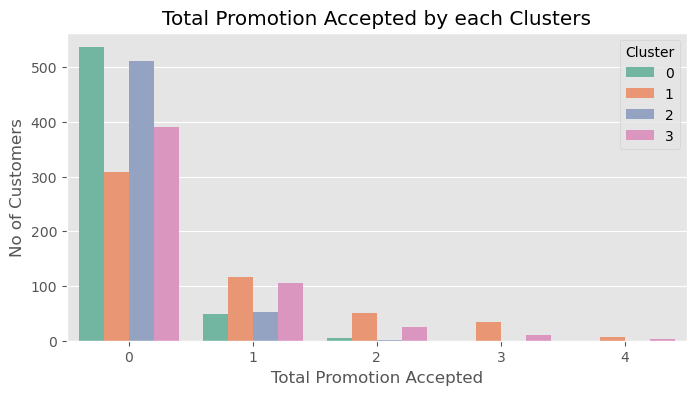

In [72]:
df_promoCnt = df2.groupby(by = ['Cluster','Total_PromoAccepted'],as_index = False).agg(count = ('Total_PromoAccepted','count')).sort_values(by = 'Cluster',ascending=True)

plt.figure(figsize=(8,4))

sns.barplot(data = df_promoCnt
            ,x = 'Total_PromoAccepted'
            ,y = 'count'
            ,hue = 'Cluster'
            ,palette='Set2')

plt.xlabel('Total Promotion Accepted')
plt.ylabel('No of Customers')
plt.title('Total Promotion Accepted by each Clusters')
plt.legend(title = 'Cluster', loc = 'upper right')
plt.show()

**Insight:** It can be clearly seen that:
- The marketing campaigns are not really effective
- Not so many customers in the targeted leads after all.
    - The marketing campaigns must be revised and well-planned to have increase CR (Conversion Rate) for better selling performance

### **6. Customer Profiling**

I will find Customer Profile by 3 type of identity:

- **Identity 1**: ['Kidhome', 'Teenhome', 'Living_Situation', 'Education_Level', 'Total_Children', 'Is_Parent']
- **Identity 2**: ['Customer_Active_Days', 'Age']
- **Indentity 3**: ['Web_Ratio', 'Store_Radio','Deal_Ratio']

#### **Identity 1**

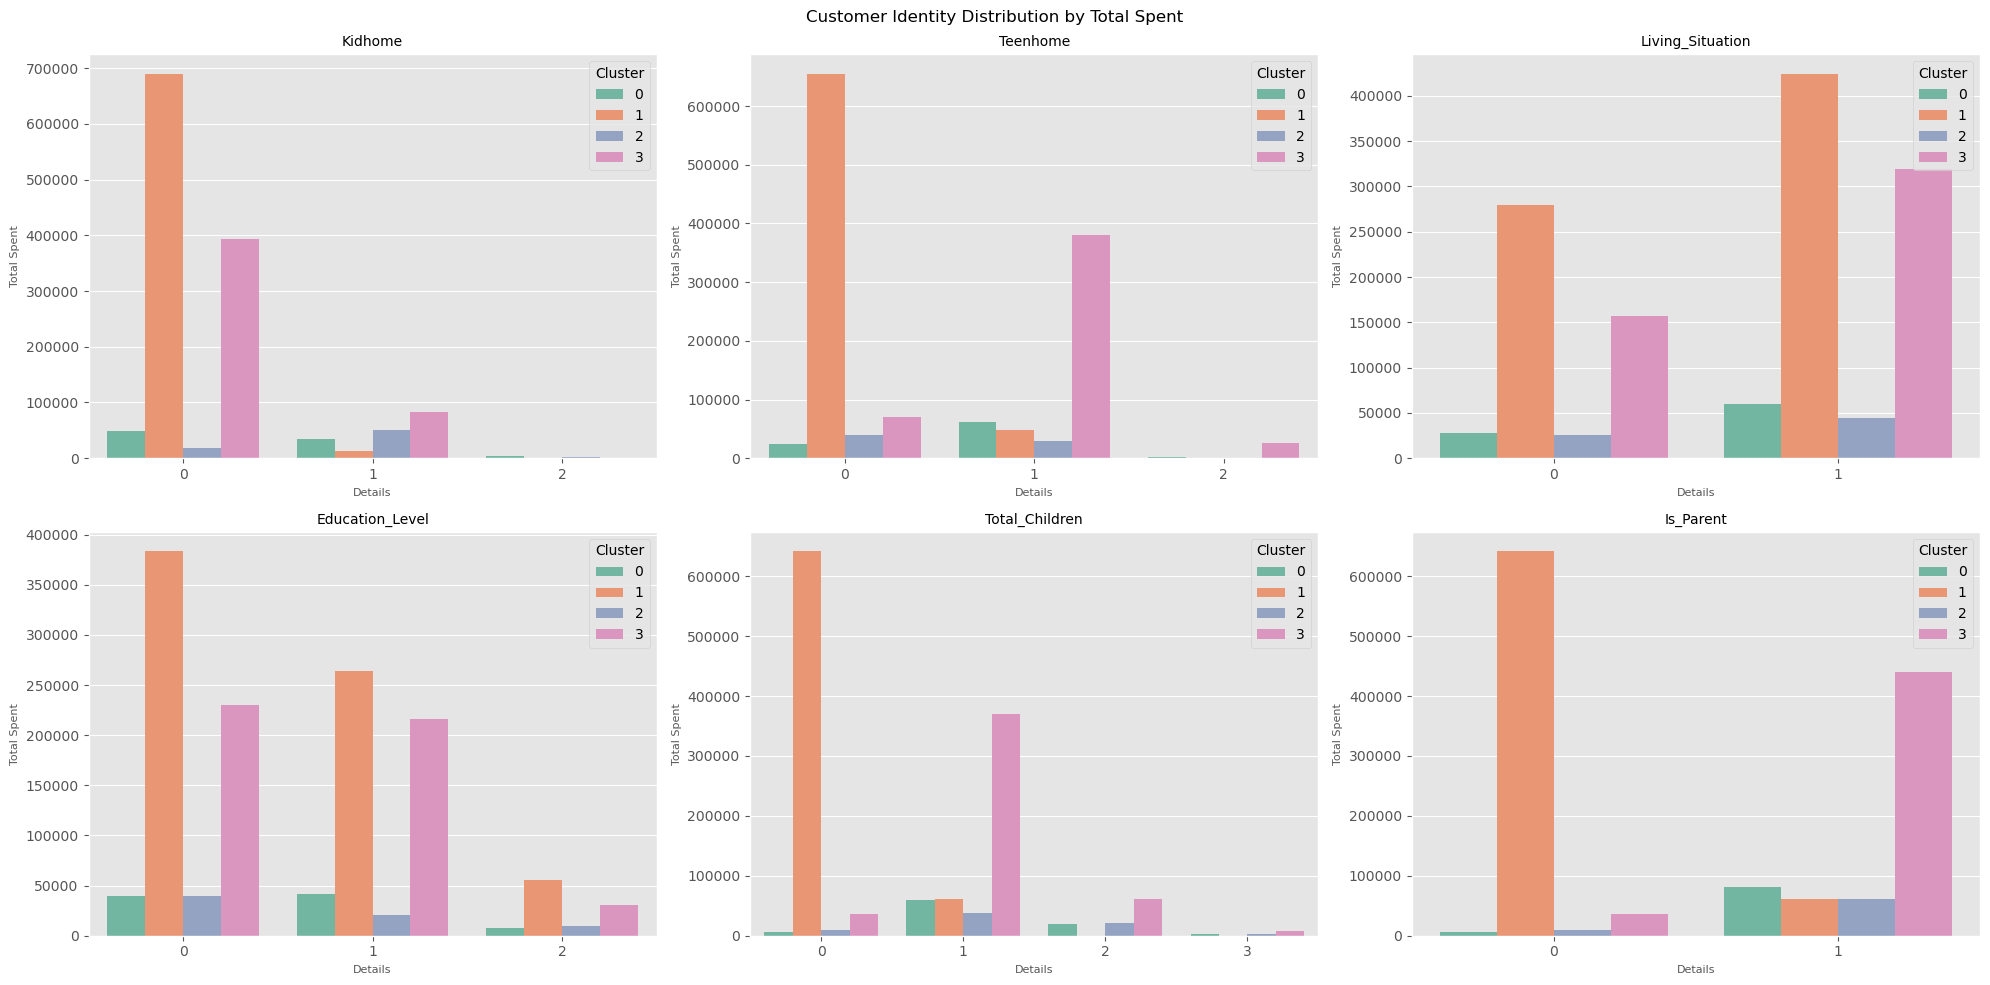

In [73]:
identity1 = ['Kidhome', 'Teenhome', 'Living_Situation',
                      'Education_Level', 'Total_Children', 'Is_Parent']

fig, axes = plt.subplots(nrows=2, ncols= 3, figsize=(20, 10))

for i, feature in enumerate(identity1):
    df_identity = df2.groupby(by=['Cluster', feature], as_index=False).agg(Total_Spent=('Total_Spent', 'sum'))

    sns.barplot(data=df_identity, x=feature, y='Total_Spent', hue='Cluster', palette='Set2', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(feature, size = 10)
    axes[i // 3, i % 3].set_xlabel('Details', size = 8)
    axes[i // 3, i % 3].set_ylabel('Total Spent',size = 8)
    axes[i // 3, i % 3].legend(loc = 'upper right', title = 'Cluster')

plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()

**Insights Identity 1**:
- **Cluster 0** : Most of them are Parents and have 1 little kid or 1 teenager
- **Cluster 1** : Parents, have childrens (most of their children are teenagers)
- **Cluster 2** : Most of them are Single OR Young Couples & not having children yet
- **Cluster 3** : Most of them are Young Parents, have childrens (most of their children are kids)

#### **Identity 2: ['Customer_Active_Days', 'Age']**


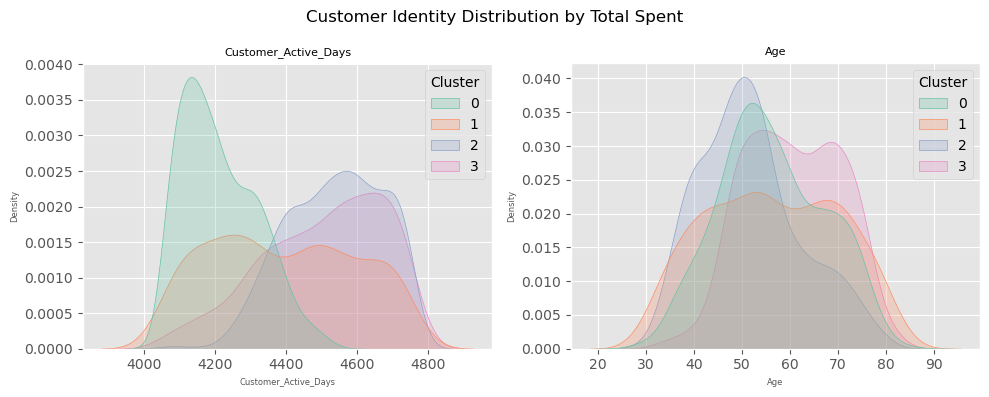

In [74]:
identity2 = ['Customer_Active_Days', 'Age']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, feature in enumerate(identity2):
    sns.kdeplot(data=df2, x=feature, hue='Cluster', palette='Set2', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(feature, size = 8)
    axes[i].set_xlabel(feature, size = 6)
    axes[i].set_ylabel('Density',size = 6)

plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()

**Insigh Identity 2:**
- **Cluster 0**: Adult, active_day: newer
- **Cluster 1**: Older, active_day: long-term
- **Cluster 2**: Younger, active_day: long-term -> The best segment customer 
- **Cluster 3**: All age, newer

#### **Identity3: ['Web_Ratio', 'Store_Ratio','Deal_Ratio']**

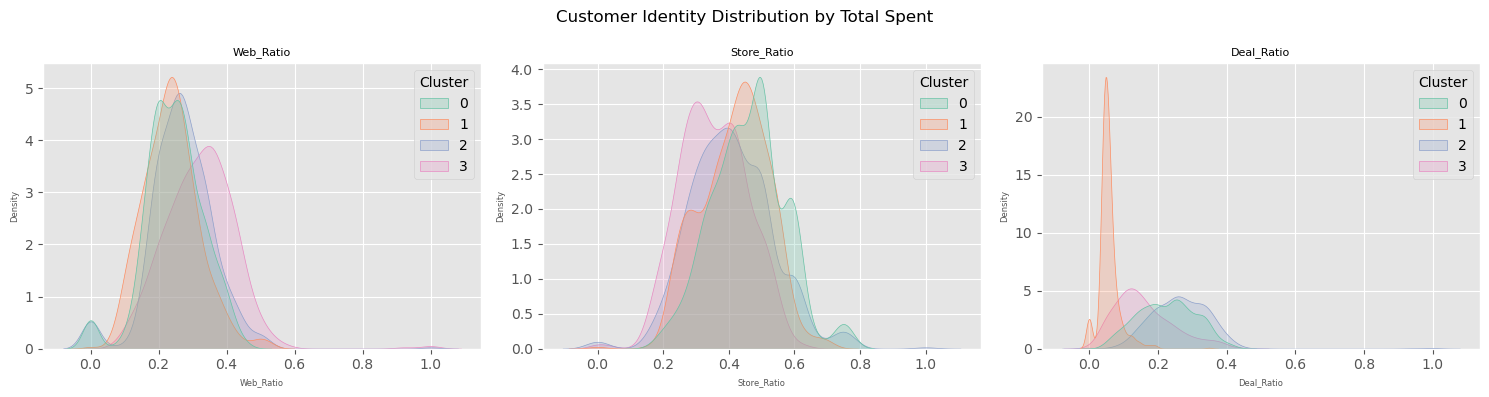

In [75]:
identity3 = ['Web_Ratio', 'Store_Ratio','Deal_Ratio']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, feature in enumerate(identity3):
    sns.kdeplot(data=df2, x=feature, hue='Cluster', palette='Set2', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(feature, size = 8)
    axes[i].set_xlabel(feature, size = 6)
    axes[i].set_ylabel('Density',size = 6)
plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()

**Insight identity3**:
- **Cluster 0**: Web_Ratio: High, Store_Ratio: High, Deal_Ratio: Low
   <br>-> Loyal customers, multi-channel, little interest in promotions.
- **Cluster 1**: Web_Ratio: Medium, Store_Ratio: High/Medium, Deal_Ratio: Low
   <br>-> Stable customers, balanced shopping channels, little interest in promotions.
- **Cluster 2**: Web_Ratio: High, Store_Ratio: Medium, Deal_Ratio: Low
   <br>-> Young customers, prioritize online, little interest in promotions.
- **Cluster 3**: Web_Ratio: High, Store_Ratio: High, Deal_Ratio: High
   <br>-> Potential customers, multi-channel, very interested in promotions, usually young people or housewives.


## **Export file to put into Power BI**

In [76]:
df2.to_csv('Customer_Segmentation_Final.csv', index=False)

## **Conclusion & Strategic Recommendations**

Currently, the marketing campaigns are not yielding optimal results due to a lack of personalization. The most efficient way to improve the **Conversion Rate (CR)** is to develop tailored strategies based on the identified customer segments.

---

### **1. Customer Cluster Profiles Analysis**

The segmentation process has revealed four distinct customer groups, each with unique behaviors and value to the business:

| Cluster | Persona Name | Key Characteristics | Income & Spending | Purchasing Motivation | Preferred Channel |
| :---: | :--- | :--- | :--- | :--- | :--- |
| **2** | **"High-Value, Digital-First Professionals"** | Younger, Single/Young Couples, Long-term activeness. | **High Income & High Spent (Best Segment)** | Quality, convenience, exclusivity, premium experience. | **Online (Primary)** |
| **3** | **"Promotion-Driven Young Families"** | Young Parents, with kids, newer activeness, high potential. | Average Income & Average Spent | **VERY interested in promotions**, value for money, family solutions. | Multi-channel |
| **0** | **"Loyal, Budget-Aware Parents"** | Adult Parents, with kids/teens, newer activeness, loyal. | Average Income & Low Spent | Trustworthiness, family-oriented products, long-term value, little interest in generic promotions. | Multi-channel |
| **1** | **"Stable, Low-Engagement Older Families"** | Older Parents, with teenagers, long-term activeness, stable. | Low Income & Low Spent | Stability, basic necessities, simple support, low interest in promotions. | Store |

---

### **2. Business & Marketing Strategy Recommendations by Cluster**

Strategies must focus on **maximizing value from Cluster 2** and **activating/increasing spending from Clusters 0, 3, and 1.**

#### **A. Cluster 2: High-Value, Digital-First Professionals (Profit Maximization)**
This group delivers the highest value and must be retained with premium experiences.

| Goal | Strategy | Specific Actions |
| :--- | :--- | :--- |
| **Retention & Increase Share of Wallet** | **VIP Treatment & Exclusive Access** | - Implement a **VIP Tier program** offering non-discount-based privileges (e.g., Priority Support, early access to new/limited-edition products). |
| **Channel Optimization** | **Enhance E-commerce Experience** | - Invest in improving website/app speed and features. Use **retargeting campaigns** for high-end products. |

#### **B. Cluster 3: Promotion-Driven Young Families (Growth Potential)**
The most promising group to increase spending if incentivized correctly.

| Goal | Strategy | Specific Actions |
| :--- | :--- | :--- |
| **Acquisition & Increase Frequency** | **Value-Driven & Family Promotions** | - Run strategic **Flash Sales** or **Family Bundle offers** with compelling value propositions. |
| **Activation** | **Personalized Discount Codes** | - Use Email/SMS to send **personalized discount codes**, emphasizing **smart savings** for young families. |

#### **C. Cluster 0: Loyal, Budget-Aware Parents (Increase Average Order Value - AOV)**
Leverage their loyalty to encourage larger transactions per visit.

| Goal | Strategy | Specific Actions |
| :--- | :--- | :--- |
| **Increase AOV** | **Loyalty & Threshold Offers** | - Design a **Loyalty Program** that rewards heavily for purchasing high-margin family products. |
| **Incentive** | **Cross-Channel Upsell** | - Use **"Gift with Purchase"** or **"Spend $X, Get Y"** offers (where $X is slightly above their current AOV). |

#### **D. Cluster 1: Stable, Low-Engagement Older Families (Reactivation & Service)**
This group requires simplicity and affordability.

| Goal | Strategy | Specific Actions |
| :--- | :--- | :--- |
| **Reactivation & Increase LTV** | **Core Product Offers & Simple Support** | - Offer incentives for **core/essential products** at competitive prices. |
| **Increase CR** | **Direct & Store-Focused Communication** | - Leverage the **Store** channel. Send simple mailers or catalogs with special in-store offers. Focus on clear, direct messaging, avoiding complex tech-focused campaigns. |

---

### **3. Overall Business Insights**

1.  **Channel Priority:** While the majority of customers purchase via the **Store**, the highest-value segment (Cluster 2) is **Digital-First**. The business must **maintain an optimized in-store experience** while simultaneously **investing significantly in the e-commerce platform** to cater to the most profitable segment.
2.  **Campaign Efficacy:** The low overall campaign response rate confirms that generic campaigns are inefficient. Transitioning to **cluster-based, personalized marketing** is mandatory to boost CR.
3.  **Spending Correlation:** The total amount spent is highly correlated with **customer income** and the **total purchases made**. Notably, customers with **no dependents/children** (a defining feature of Cluster 2) are the highest spenders.
